# Clasificación de Noticias con Random Forest

Este cuaderno aplica el algoritmo Naive Bayes para la detección de noticias falsas utilizando distintos fragmentos del texto: el título, el cuerpo completo y ambos combinados.

Para cada enfoque se realiza:
- Preparación del conjunto de datos
- Entrenamiento del modelo
- Evaluación mediante matriz de confusión y curva ROC
- Guardado del modelo entrenado

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')  # Añades esa carpeta al path
sys.path.append('../models')  # Añades esa carpeta al path
from models import train_random_forest
from metrics import plot_roc_auc
from metrics import plot_feature_importance
from metrics import plot_confusion_matrix
import joblib
from pathlib import Path
from utils import save_model

In [2]:
# Ruta a los datos 
path = '../data/processed/listo.csv' 

# Cargar CSVs
df = pd.read_csv(path, keep_default_na=False)

### RandomForest solo titulo

In [3]:
X = df[['title', 'category']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 43294
The shape of X_test is: 18555


In [4]:
RFtitle = train_random_forest(X_train, y_train)
RFtitle

Mejores parámetros encontrados: {'clf__min_samples_split': 5, 'clf__n_estimators': 300}


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('texto',
                                                  TfidfVectorizer(max_features=5000),
                                                  'title'),
                                                 ('categoria', OneHotEncoder(),
                                                  ['category'])])),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=300,
                                        random_state=42))])

In [5]:
predictions_title=RFtitle.predict(X_test)
print(confusion_matrix(y_test, predictions_title))
print('\n')
print(classification_report(y_test, predictions_title))

[[9246 1076]
 [1186 7047]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89     10322
           1       0.87      0.86      0.86      8233

    accuracy                           0.88     18555
   macro avg       0.88      0.88      0.88     18555
weighted avg       0.88      0.88      0.88     18555



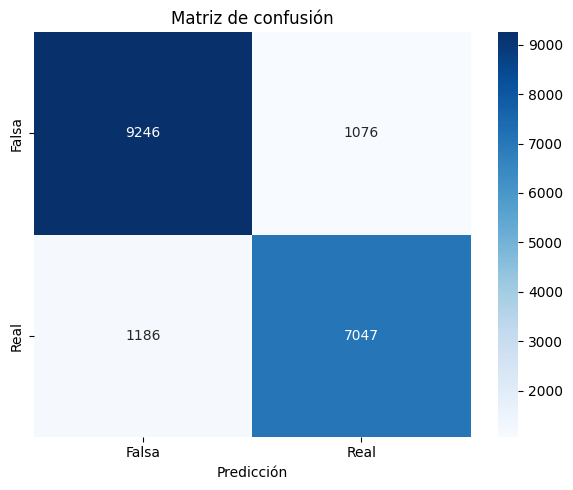

In [6]:
plot_confusion_matrix(y_test, predictions_title)

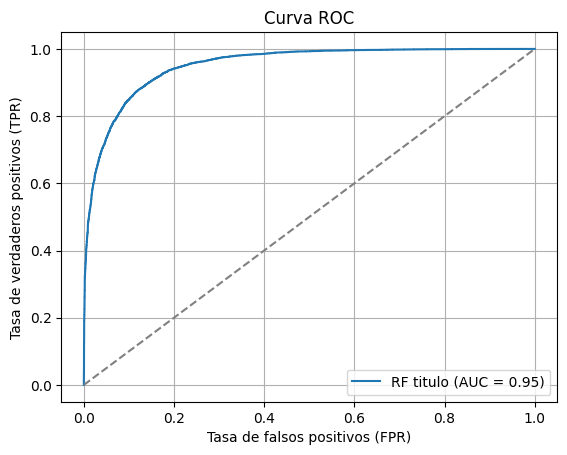

In [7]:
plot_roc_auc(RFtitle, X_test, y_test, label='RF titulo')

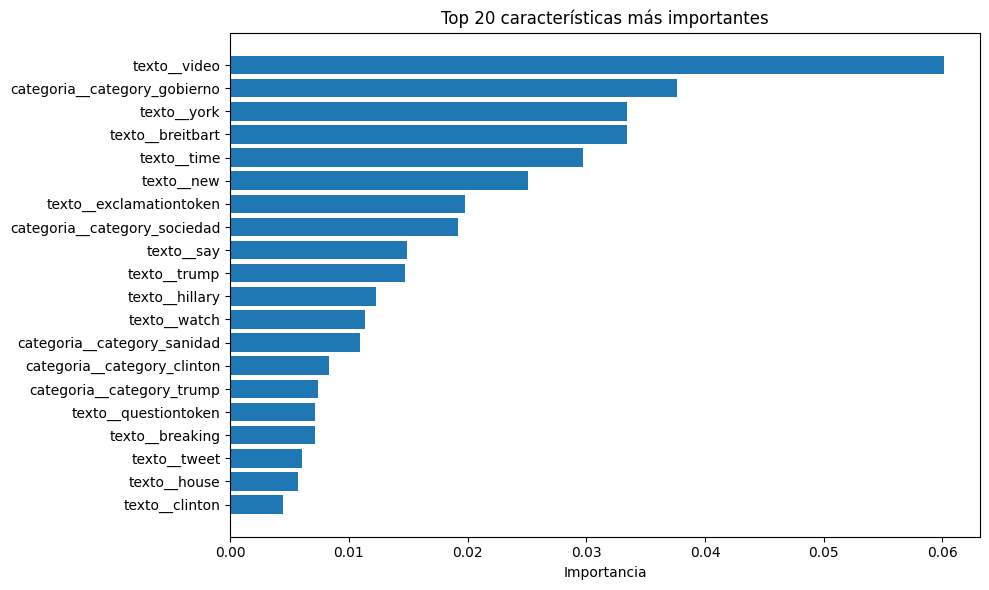

In [8]:
plot_feature_importance(RFtitle)

### Random Forest solo con el texto

In [9]:
X = df[['text', 'category']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)


In [10]:
RFbody = train_random_forest(X_train, y_train)

predictions_body=RFbody.predict(X_test)
print(confusion_matrix(y_test, predictions_body))
print('\n')
print(classification_report(y_test, predictions_body))

Mejores parámetros encontrados: {'clf__min_samples_split': 2, 'clf__n_estimators': 300}
[[9546  776]
 [ 674 7559]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10322
           1       0.91      0.92      0.91      8233

    accuracy                           0.92     18555
   macro avg       0.92      0.92      0.92     18555
weighted avg       0.92      0.92      0.92     18555



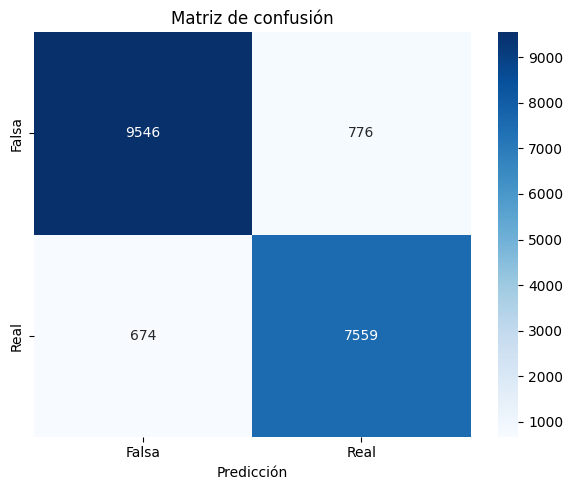

In [11]:
plot_confusion_matrix(y_test, predictions_body)

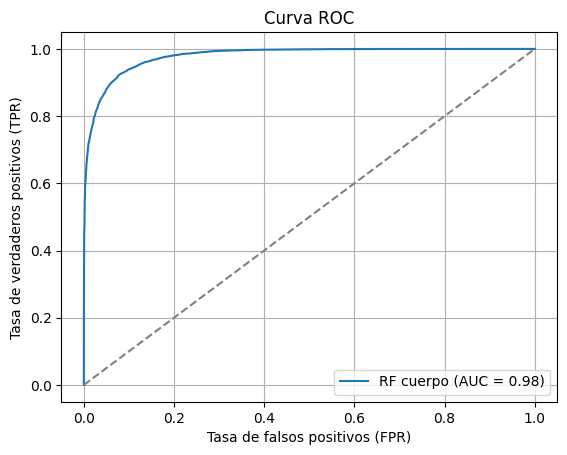

In [12]:
plot_roc_auc(RFbody, X_test, y_test, label='RF cuerpo')

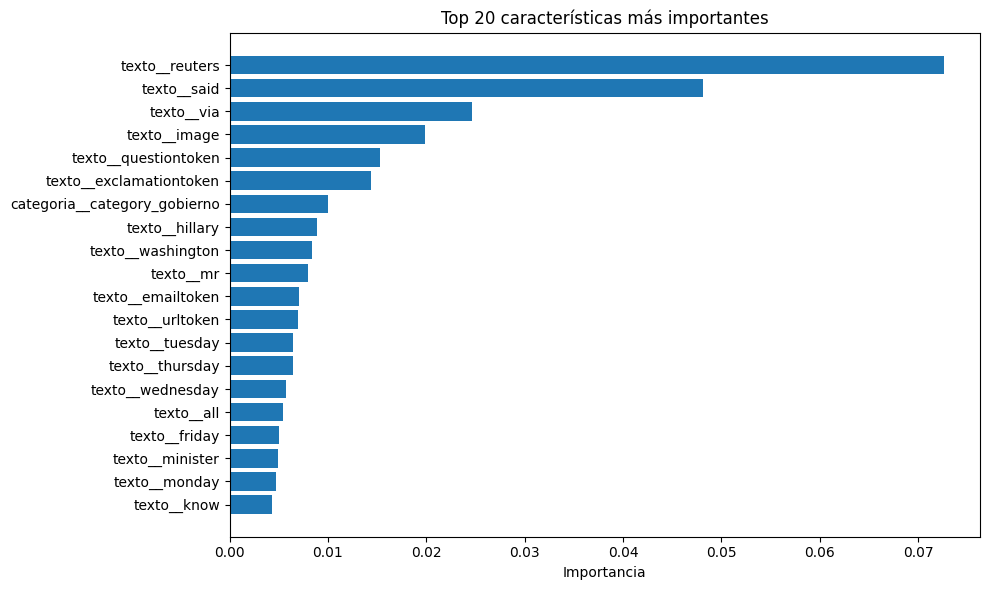

In [13]:
plot_feature_importance(RFbody)

### Random Forest con titulo y cuerpo

In [14]:
X = df[['sentences', 'category']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)


In [15]:
RFtotal = train_random_forest(X_train, y_train)

predictions_total=RFtotal.predict(X_test)
print(confusion_matrix(y_test, predictions_total))
print('\n')
print(classification_report(y_test, predictions_total))

Mejores parámetros encontrados: {'clf__min_samples_split': 5, 'clf__n_estimators': 300}
[[9780  542]
 [ 605 7628]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10322
           1       0.93      0.93      0.93      8233

    accuracy                           0.94     18555
   macro avg       0.94      0.94      0.94     18555
weighted avg       0.94      0.94      0.94     18555



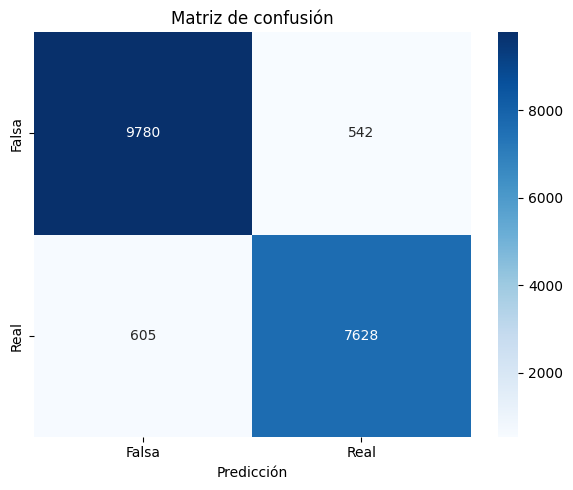

In [16]:
plot_confusion_matrix(y_test, predictions_total)

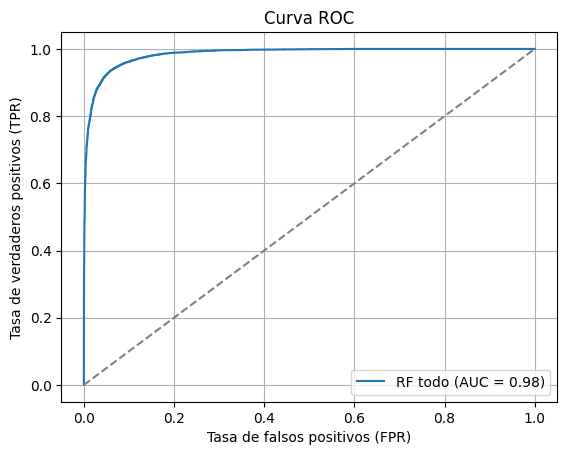

In [17]:
plot_roc_auc(RFtotal, X_test, y_test, label='RF todo')

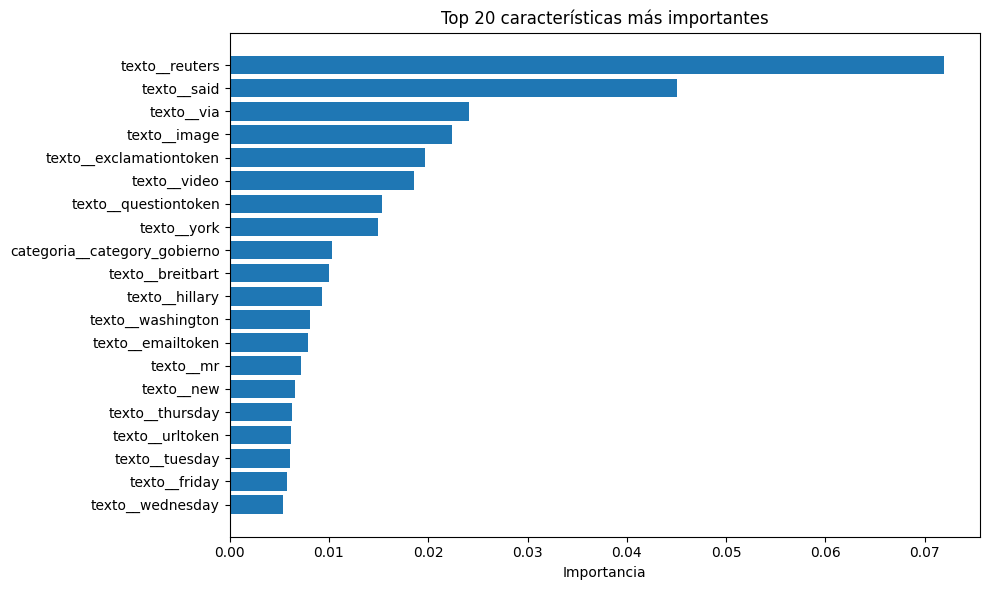

In [18]:
plot_feature_importance(RFtotal)

In [19]:
save_model(RFtitle, 'random_forest_title')
save_model(RFbody, 'random_forest_body')
save_model(RFtotal, 'random_forest_total')

Modelo guardado en: /home/inma/Escritorio/tfg_fakenews/models/random_forest_title.pkl
Modelo guardado en: /home/inma/Escritorio/tfg_fakenews/models/random_forest_body.pkl
Modelo guardado en: /home/inma/Escritorio/tfg_fakenews/models/random_forest_total.pkl
